In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("D:\Internships\Solar Secure Solution Data Science Intern\Project+1\Project 1\Data\hotel_bookings.csv")

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,9/7/2017


### Cleaning the data

In [ ]:
df.shape

(119390, 32)

In [ ]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
def data_clean(df):
    df.fillna(0,inplace=True) #zero imputation
    print(df.isnull().sum())

In [ ]:
data_clean(df)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
list_cols=["children","adults","babies"]

for i in list_cols:
    print(f"{i} has unique values as {df[i].unique()}")

children has unique values as [ 0.  1.  2. 10.  3.]
adults has unique values as [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
babies has unique values as [ 0  1  2 10  9]


In [ ]:
#clean the data
filtered_data = (df['children']==0) & (df['adults']==0) & (df['babies']==0)  # dirty data
final_data = df[~filtered_data]

In [ ]:
final_data.shape

(119210, 32)

### Where do the guest come from (Spatial Analysis)

In [ ]:
country_wise_data = final_data[final_data['is_canceled']==0]['country'].value_counts().reset_index()
country_wise_data.columns = ["Country","No. of guests"]
print(country_wise_data)

    Country  No. of guests
0       PRT          20977
1       GBR           9668
2       FRA           8468
3       ESP           6383
4       DEU           6067
..      ...            ...
161     BHR              1
162     DJI              1
163     MLI              1
164     NPL              1
165     FRO              1

[166 rows x 2 columns]


In [ ]:
import plotly.express as px

In [ ]:
map_guests = px.choropleth(country_wise_data , locations= country_wise_data["Country"], color= country_wise_data["No. of guests"], hover_name = country_wise_data["Country"], title = "Home country of guests")

In [ ]:
map_guests.show()

### How much do guests pay for a room per night

In [ ]:
final_data["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
df["adr"]

0           0.00
1           0.00
2          75.00
3          75.00
4          98.00
           ...  
119385     96.14
119386    225.43
119387    157.71
119388    104.40
119389    151.20
Name: adr, Length: 119390, dtype: float64

In [ ]:
data = final_data[final_data["is_canceled"]==0]

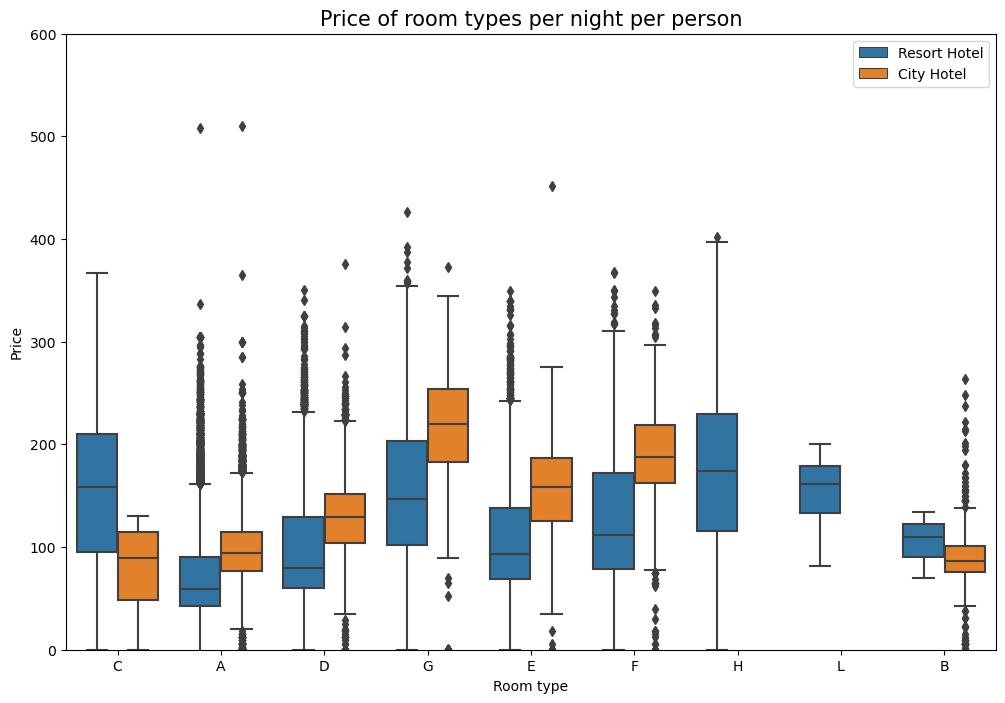

In [ ]:
plt.figure(figsize =(12,8))

sns.boxplot(x="reserved_room_type", y="adr", hue="hotel",data= data)

plt.title("Price of room types per night per person", fontsize=15)
plt.xlabel("Room type")
plt.ylabel("Price")
plt.legend(loc="upper right")
plt.ylim(0,600)
plt.show()

### How does the price per night(adr) vary over the year

In [ ]:
final_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
data_resort = final_data[(final_data["hotel"] == "Resort Hotel") & (final_data["is_canceled"]==0)]
data_city = final_data[(final_data["hotel"] == "City Hotel") & (final_data["is_canceled"]==0)]

print(data_resort.head())


          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

In [ ]:
#how many people came to resort hotel per month

resort_hotel= data_resort.groupby(["arrival_date_month"])['adr'].mean().reset_index()



In [ ]:
#how many people came to city hotel per month

city_hotel= data_city.groupby(["arrival_date_month"])['adr'].mean().reset_index()


In [ ]:
final= resort_hotel.merge(city_hotel, on="arrival_date_month")
final.columns=["Month","price_for_resort_hotel","price_for_city_hotel"]

In [ ]:
print(final)

        Month  price_for_resort_hotel  price_for_city_hotel
0       April               75.867816            111.962267
1      August              181.205892            118.674598
2    December               68.410104             88.401855
3    February               54.147478             86.520062
4     January               48.761125             82.330983
5        July              150.122528            115.818019
6        June              107.974850            117.874360
7       March               57.056838             90.658533
8         May               76.657558            120.669827
9    November               48.706289             86.946592
10    October               61.775449            102.004672
11  September               96.416860            112.776582


### Sort the month

In [ ]:
test=final

In [ ]:
from calendar import month_name

def sort_month(df, colname):
    month_dict = {j:i for i,j in enumerate(month_name)} #dictionary comprehension
    df["month_num"]=df[colname].apply(lambda x:month_dict[x])
    return df.sort_values(by="month_num").reset_index(). drop(["index", "month_num"], axis=1)

In [ ]:
sort_month(test, "Month")

,Month,price_for_resort_hotel,price_for_city_hotel
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


<AxesSubplot:xlabel='Month'>

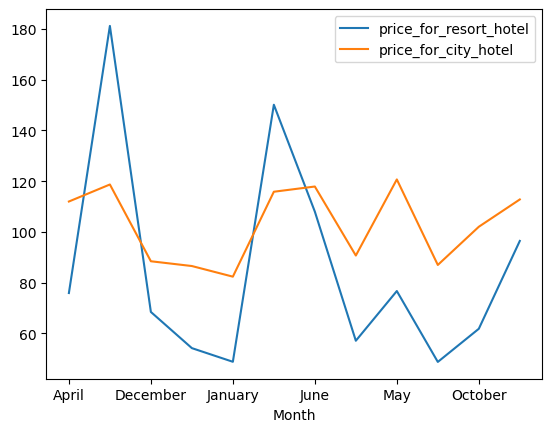

In [ ]:
final.plot(kind="line", x="Month", y=["price_for_resort_hotel", "price_for_city_hotel"])

### Which are the most busy month or in which months guests are high

In [ ]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
rush_resort=data_resort["arrival_date_month"].value_counts().reset_index()

In [ ]:
rush_resort.columns=["Month","no of guests"]
print(rush_resort)

        Month  no of guests
0      August          3257
1        July          3137
2     October          2575
3       March          2571
4       April          2550
5         May          2535
6    February          2308
7   September          2102
8        June          2037
9    December          2014
10   November          1975
11    January          1866


In [ ]:
rush_city=data_city["arrival_date_month"].value_counts().reset_index()

rush_city.columns=["Month","no of guests"]
print(rush_city)

        Month  no of guests
0      August          5367
1        July          4770
2         May          4568
3        June          4358
4     October          4326
5   September          4283
6       March          4049
7       April          4010
8    February          3051
9    November          2676
10   December          2377
11    January          2249


In [ ]:
final_rush = rush_resort.merge(rush_city, on="Month")

final_rush.columns = ["Month", "No of guests in Resort Hotel" , "No of guests in City Hotel"]

In [ ]:
final_rush

,Month,No of guests in Resort Hotel,No of guests in City Hotel
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [ ]:
final_rush= sort_month(final_rush , "Month")

<AxesSubplot:xlabel='Month'>

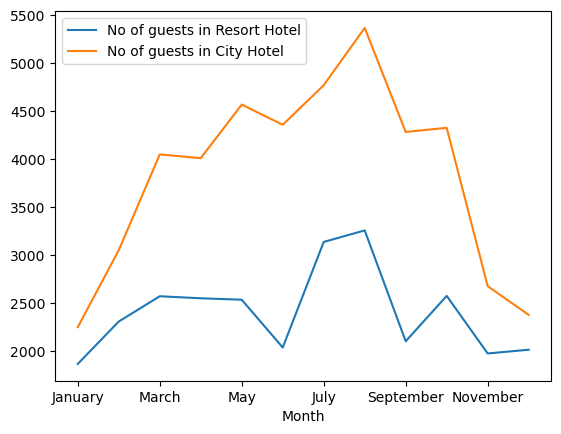

In [ ]:
final_rush.plot(kind = "line", x="Month", y=["No of guests in Resort Hotel", "No of guests in City Hotel"])

### How long do people stay at the hotel

In [ ]:
filter_condition = final_data["is_canceled"]==0
clean_data= final_data[filter_condition]

clean_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
clean_data["total_nights"]=clean_data["stays_in_weekend_nights"]+ clean_data["stays_in_week_nights"]

C:\Users\shali\AppData\Local\Temp\ipykernel_10544\189360228.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
clean_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015,2


In [ ]:
stay = clean_data.groupby(["total_nights","hotel"]).agg('count').reset_index()

In [ ]:
stay = stay.iloc[:, 0:3]

In [ ]:
stay

,total_nights,hotel,is_canceled
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983
...,...,...,...
57,46,Resort Hotel,1
58,48,City Hotel,1
59,56,Resort Hotel,1
60,60,Resort Hotel,1


In [ ]:
stay=stay.rename(columns = {'is_canceled': "Number of stays"})

<AxesSubplot:xlabel='total_nights', ylabel='Number of stays'>

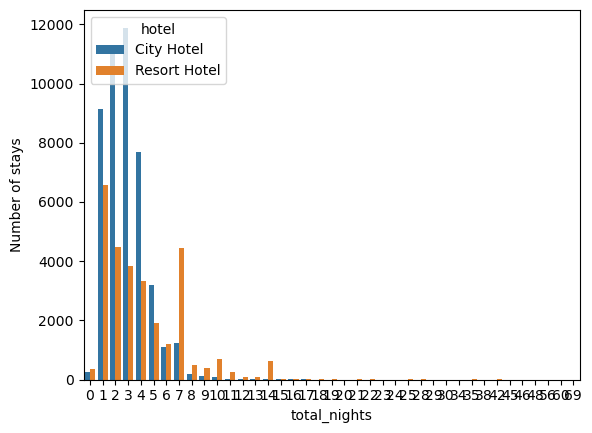

In [ ]:
sns.barplot(x="total_nights", y= "Number of stays", hue="hotel", hue_order =["City Hotel", "Resort Hotel"], data=stay)

### Select Important Numerical Features using Correlation

In [ ]:
correlation=final_data.corr()

In [ ]:
correlation =correlation["is_canceled"][1:]

In [ ]:
correlation.abs().sort_values(ascending=False)

lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [ ]:
list_not=["days_in_waiting_list","arrival_date_year"]

In [ ]:
num_features=[col for col in final_data.columns if final_data[col].dtypes != "O" and col not in list_not]   #numerical features

In [ ]:
print(num_features)

['is_canceled', 'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [ ]:
final_data["hotel"].dtype #categorical

dtype('O')

In [ ]:
final_data["adr"].dtype

dtype('float64')

### Select important Categorical features

In [ ]:
final_data["reservation_status"].value_counts()

Check-Out    75011
Canceled     42993
No-Show       1206
Name: reservation_status, dtype: int64

In [ ]:
final_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
cat_not = ["county","reservation_staus","booking_ch","assigned_room_type" , "days_in_waiting_list"]

In [ ]:
cat_features =[col for col in final_data.columns if final_data[col].dtypes == "O" and col not in cat_not]

In [ ]:
print(cat_features)

['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


In [ ]:
data_cat = final_data[cat_features]

In [ ]:
print(data_cat.head())

          hotel arrival_date_month meal country market_segment  \
0  Resort Hotel               July   BB     PRT         Direct   
1  Resort Hotel               July   BB     PRT         Direct   
2  Resort Hotel               July   BB     GBR         Direct   
3  Resort Hotel               July   BB     GBR      Corporate   
4  Resort Hotel               July   BB     GBR      Online TA   

  distribution_channel reserved_room_type deposit_type customer_type  \
0               Direct                  C   No Deposit     Transient   
1               Direct                  C   No Deposit     Transient   
2               Direct                  A   No Deposit     Transient   
3            Corporate                  A   No Deposit     Transient   
4                TA/TO                  A   No Deposit     Transient   

  reservation_status reservation_status_date  
0          Check-Out                7/1/2015  
1          Check-Out                7/1/2015  
2          Check-Out         

In [ ]:

data_cat["reservation_status_date"] = pd.to_datetime(data_cat["reservation_status_date"])

C:\Users\shali\AppData\Local\Temp\ipykernel_10544\2777063560.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
print(data_cat["reservation_status_date"])

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 119210, dtype: datetime64[ns]


In [ ]:
data_cat["year"]= data_cat["reservation_status_date"].dt.year

data_cat["month"]=  data_cat["reservation_status_date"].dt.month

data_cat["day"]=  data_cat["reservation_status_date"].dt.day

C:\Users\shali\AppData\Local\Temp\ipykernel_10544\3453953445.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\shali\AppData\Local\Temp\ipykernel_10544\3453953445.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\shali\AppData\Local\Temp\ipykernel_10544\3453953445.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [ ]:
data_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,year,month,day
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,No Deposit,Transient,Check-Out,2015-07-01,2015,7,1
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,No Deposit,Transient,Check-Out,2015-07-01,2015,7,1
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,No Deposit,Transient,Check-Out,2015-07-02,2015,7,2
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,No Deposit,Transient,Check-Out,2015-07-02,2015,7,2
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,No Deposit,Transient,Check-Out,2015-07-03,2015,7,3


In [ ]:
data_cat.drop("reservation_status_date",axis=1,inplace=True)

C:\Users\shali\AppData\Local\Temp\ipykernel_10544\3119463780.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data_cat.drop("reservation_status",axis=1,inplace=True)

C:\Users\shali\AppData\Local\Temp\ipykernel_10544\2661814300.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


### Feature Encoding

### Mean Encoding Technique

In [ ]:
data_cat.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'year', 'month', 'day'],
      dtype='object')

In [ ]:
data_cat["cancellation"] = final_data["is_canceled"]

C:\Users\shali\AppData\Local\Temp\ipykernel_10544\2073349528.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data_cat.drop("country",axis=1,inplace=True)

C:\Users\shali\AppData\Local\Temp\ipykernel_10544\1179611262.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
print(data_cat)

               hotel arrival_date_month meal market_segment  \
0       Resort Hotel               July   BB         Direct   
1       Resort Hotel               July   BB         Direct   
2       Resort Hotel               July   BB         Direct   
3       Resort Hotel               July   BB      Corporate   
4       Resort Hotel               July   BB      Online TA   
...              ...                ...  ...            ...   
119385    City Hotel             August   BB  Offline TA/TO   
119386    City Hotel             August   BB      Online TA   
119387    City Hotel             August   BB      Online TA   
119388    City Hotel             August   BB      Online TA   
119389    City Hotel             August   HB      Online TA   

       distribution_channel reserved_room_type deposit_type customer_type  \
0                    Direct                  C   No Deposit     Transient   
1                    Direct                  C   No Deposit     Transient   
2           

In [ ]:
def mean_encode(df, col , mean_col):
    df_dict = df.groupby([col])[mean_col].mean().to_dict()
    df[col]=df[col].map(df_dict)
    return df

for col in data_cat.columns[0:8]:
    data_cat = mean_encode(data_cat , col, "cancellation")

C:\Users\shali\AppData\Local\Temp\ipykernel_10544\860949961.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\shali\AppData\Local\Temp\ipykernel_10544\860949961.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\shali\AppData\Local\Temp\ipykernel_10544\860949961.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [ ]:
data_cat.drop(["cancellation"], axis = 1, inplace = True)

C:\Users\shali\AppData\Local\Temp\ipykernel_10544\3718714894.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
print(data_cat)

           hotel  arrival_date_month      meal  market_segment  \
0       0.277674            0.374644  0.374106        0.153712   
1       0.277674            0.374644  0.374106        0.153712   
2       0.277674            0.374644  0.374106        0.153712   
3       0.277674            0.374644  0.374106        0.187618   
4       0.277674            0.374644  0.374106        0.367590   
...          ...                 ...       ...             ...   
119385  0.417859            0.377823  0.374106        0.343313   
119386  0.417859            0.377823  0.374106        0.367590   
119387  0.417859            0.377823  0.374106        0.367590   
119388  0.417859            0.377823  0.374106        0.367590   
119389  0.417859            0.377823  0.344653        0.367590   

        distribution_channel  reserved_room_type  deposit_type  customer_type  \
0                   0.174868            0.330827       0.28402       0.407864   
1                   0.174868            0.330

### preparing our data

In [ ]:
num_data = final_data[num_features] # numerical data
cat_data = data_cat #categorical data

dataframe =pd.concat([num_data, cat_data], axis=1)

In [ ]:
print(dataframe.head())

   is_canceled  lead_time  arrival_date_week_number  \
0            0        342                        27   
1            0        737                        27   
2            0          7                        27   
3            0         13                        27   
4            0         14                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     0   
1                          1                        0                     0   
2                          1                        0                     1   
3                          1                        0                     1   
4                          1                        0                     2   

   adults  children  babies  is_repeated_guest  ...  arrival_date_month  \
0       2       0.0       0                  0  ...            0.374644   
1       2       0.0       0                 

### Handle the outliers

In [ ]:
dataframe.describe()["adr"]

count    119210.000000
mean        101.969092
std          50.434007
min          -6.380000
25%          69.500000
50%          94.950000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

C:\Users\shali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='lead_time', ylabel='Density'>

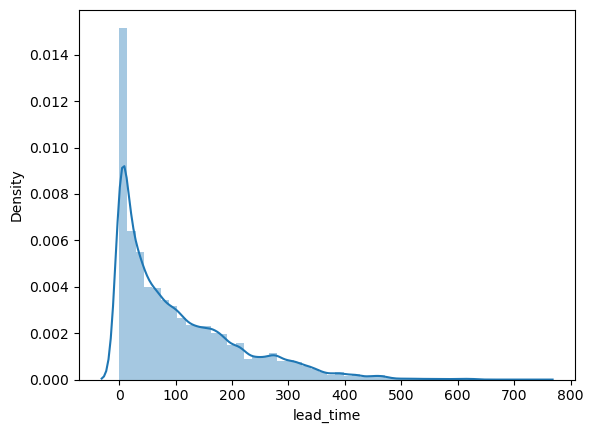

In [ ]:
#using seaborn library
sns.distplot(dataframe["lead_time"])


In [ ]:
def handle_outlier(col):
    dataframe[col] = np.log1p(dataframe[col])

In [ ]:
handle_outlier("lead_time")

C:\Users\shali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='lead_time', ylabel='Density'>

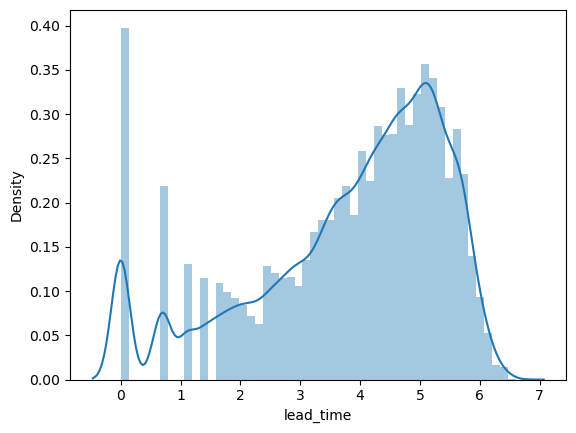

In [ ]:
sns.distplot(dataframe["lead_time"].dropna())

C:\Users\shali\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='adr', ylabel='Density'>

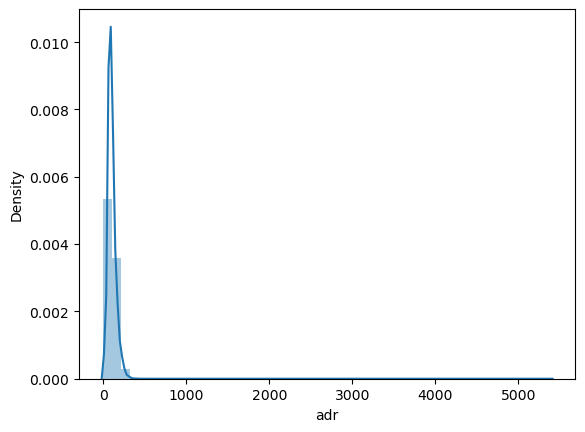

In [ ]:
sns.distplot(dataframe["adr"])

In [ ]:
handle_outlier("adr")

C:\Users\shali\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

invalid value encountered in log1p



In [ ]:
dataframe.isnull().sum()

is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
hotel                             0
arrival_date_month                0
meal                              0
market_segment                    0
distribution_channel              0
reserved_room_type                0
deposit_type                      0
customer_type                     0
year                              0
month                       

In [ ]:
dataframe.dropna(inplace = True)

### Feature Importance

In [ ]:
y = dataframe["is_canceled"] #dependent
X = dataframe.drop("is_canceled", axis = 1) #independent

In [ ]:
X.columns

Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests',
       'hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'year', 'month', 'day'],
      dtype='object')

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
feature_sel_model = SelectFromModel(Lasso(alpha = 0.005, random_state = 0))

In [ ]:
feature_sel_model.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [ ]:
feature_sel_model.get_support()

array([ True,  True, False, False, False,  True,  True, False, False,
        True, False,  True, False,  True,  True,  True,  True, False,
       False, False, False, False, False,  True, False,  True,  True,
        True])

In [ ]:
cols = X.columns
print(cols)

Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests',
       'hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'year', 'month', 'day'],
      dtype='object')


In [ ]:
selected_feature = cols[(feature_sel_model.get_support())]

In [ ]:
print(selected_feature)

Index(['lead_time', 'arrival_date_week_number', 'adults', 'children',
       'previous_cancellations', 'booking_changes', 'company', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'deposit_type', 'year', 'month', 'day'],
      dtype='object')


In [ ]:
print(f"Total features {X.shape[1]}")

Total features 28


In [ ]:
print(f"Selected features {len(selected_feature)}")

Selected features 14


In [ ]:
X.columns

Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests',
       'hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'year', 'month', 'day'],
      dtype='object')

In [ ]:
X = X[selected_feature]

In [ ]:
X.columns

Index(['lead_time', 'arrival_date_week_number', 'adults', 'children',
       'previous_cancellations', 'booking_changes', 'company', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'deposit_type', 'year', 'month', 'day'],
      dtype='object')

In [ ]:
X.head()

,lead_time,arrival_date_week_number,adults,children,previous_cancellations,booking_changes,company,adr,required_car_parking_spaces,total_of_special_requests,deposit_type,year,month,day
0,5.837730,27,2,0.0,0,3,0.0,0.000000,0,0,0.28402,2015,7,1
1,6.603944,27,2,0.0,0,4,0.0,0.000000,0,0,0.28402,2015,7,1
2,2.079442,27,1,0.0,0,0,0.0,4.330733,0,0,0.28402,2015,7,2
3,2.639057,27,1,0.0,0,0,0.0,4.330733,0,0,0.28402,2015,7,2
4,2.708050,27,2,0.0,0,0,0.0,4.595120,0,1,0.28402,2015,7,3


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

### Splitting data and building model

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 45)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train) #training of the model

C:\Users\shali\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
y_pred = logistic_model.predict(x_test) #prediction by model

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred)

array([[15282,  3400],
       [ 5309,  5812]], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.7077810958628326

### Implementing different classification algorithms

### Logistic Regression, Naive Bayes, Random Forest, Decision Tree, KNN

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
models = []

models.append(("Naive Bayes", GaussianNB()))
models.append(("Random Forest", RandomForestClassifier()))
models.append(("Decision Tree", DecisionTreeClassifier()))
models.append(("KNN", KNeighborsClassifier(n_neighbors = 5)))

In [ ]:
for name, model in models:
    print(name)
    model.fit(x_train, y_train)

    #make a predictions
    predictions = model.predict(x_test)

    #evaluate a model
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions, y_test))

    from sklearn.metrics import accuracy_score
    print(accuracy_score(predictions, y_test))

    print("\n")


Naive Bayes
[[8820 1289]
 [9862 9832]]
0.6258430359359796


Random Forest
[[18548  1233]
 [  134  9888]]
0.9541321343488911


Decision Tree
[[17867   805]
 [  815 10316]]
0.9456430560681811


KNN


C:\Users\shali\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



[[18522  1417]
 [  160  9704]]
0.9470858638392108


